In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def show_image(img, title, colorspace):
    dpi = 96
    figsize = (img.shape[1] / dpi, img.shape[0] / dpi)
    fig, ax = plt.subplots(figsize = figsize, dpi = dpi)
    if colorspace == 'RGB':
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation = 'spline16')
    if colorspace == 'gray':
        plt.imshow(img, cmap = 'gray')
    plt.title(title, fontsize = 12)
    ax.axis('off')
    plt.show()  

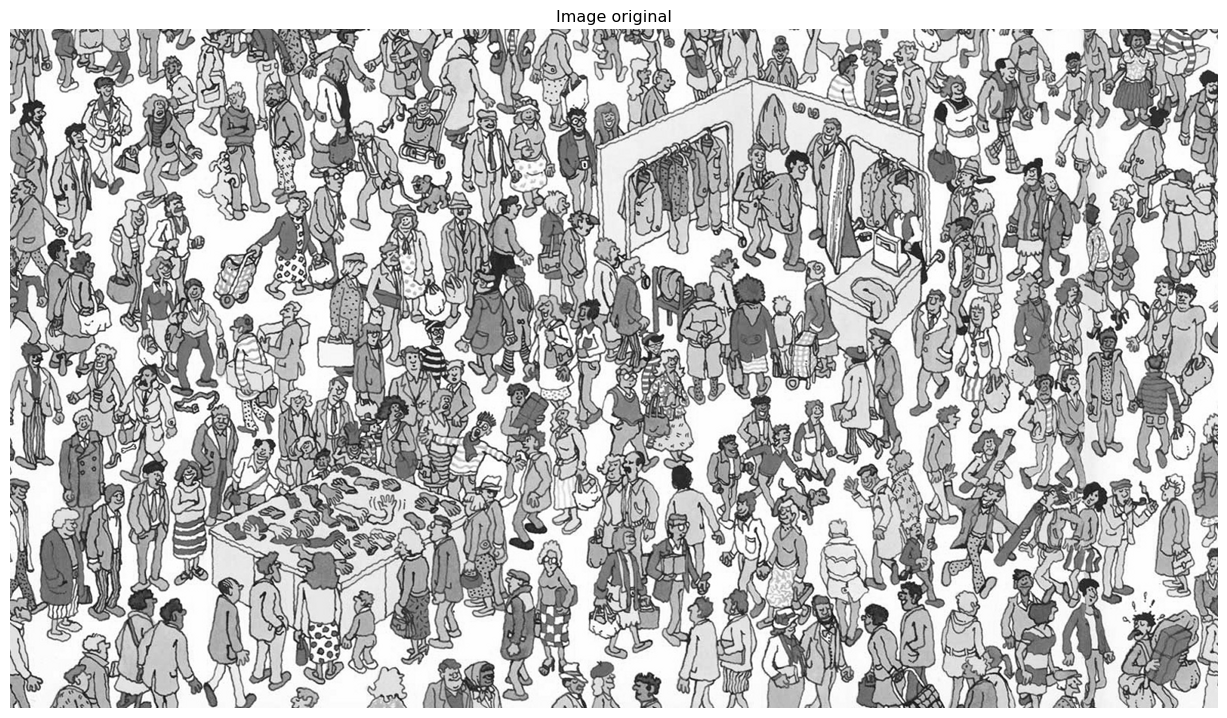

In [10]:
img_rgb = cv2.imread('models/test/map-wally.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

show_image(img_gray, 'Image original', 'RGB')

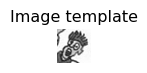

In [12]:
template = cv2.imread('models/test/template.png',0)
w, h = template.shape[::-1]

show_image(template, 'Image template', 'RGB')

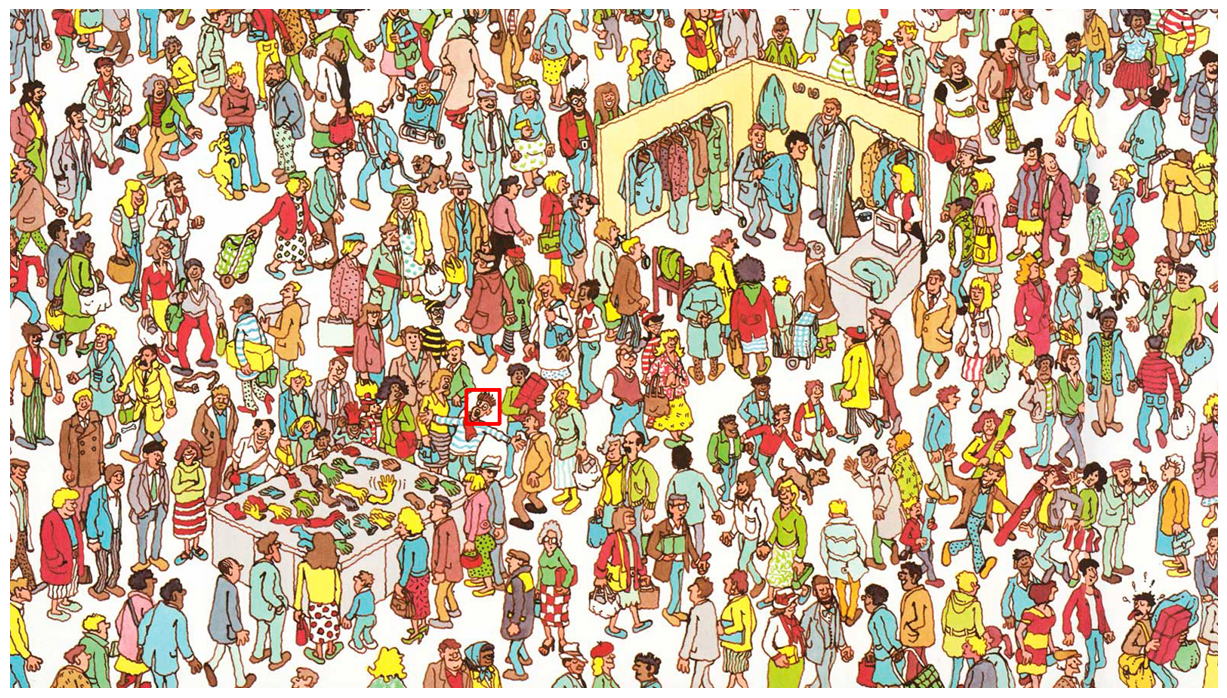

In [13]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

show_image(img_rgb, '', 'RGB')